# Guide to visualizations
***
### 1. Preparations
#### 1.1. Load the SimpleVisualizer class from *visual_utils*

In [3]:
from visual_utils import SimpleVisualizer

#### 2.1. Define the constants for further manipulations and instantiate SimpleVisualizer

In [4]:
DATA_PATH = '../data'
WEIGHTS_PATH = 'output/model_final.pth'
IMG_PATH = '/home/linups/images/sample_img.jpg'
SAVE_PATH = 'output/result.jpg'

v = SimpleVisualizer(DATA_PATH, weights_path=WEIGHTS_PATH)

### 2. Overview
The SimpleVisualizer class has 2 methods to deal with visualizations: plot and save_predict
#### 2.1. SimpleVisualizer.plot
SimpleVisualizer.plot() method has the following args:
- **num_to_show** - the number of images to plot. Default: 2
- **subset** - the subset to draw data from. Available options: *train*, *val*, *test*. Default: *train*. When plotting ground truth only *train* and *val* options are available, because test data has no annotations
- **threshold** - a minimum score threshold used during prediction. The lower the value for threshold the more bounding boxes are plotted. This parameter is only used, when ground_truth=False. Default: 0.85
- **ground_truth** - if True, plot the ground truth bounding boxes. If False, predict bounding boxes and plot them

As a starting point, let's visualize the ground truth bounding boxes for train subset:

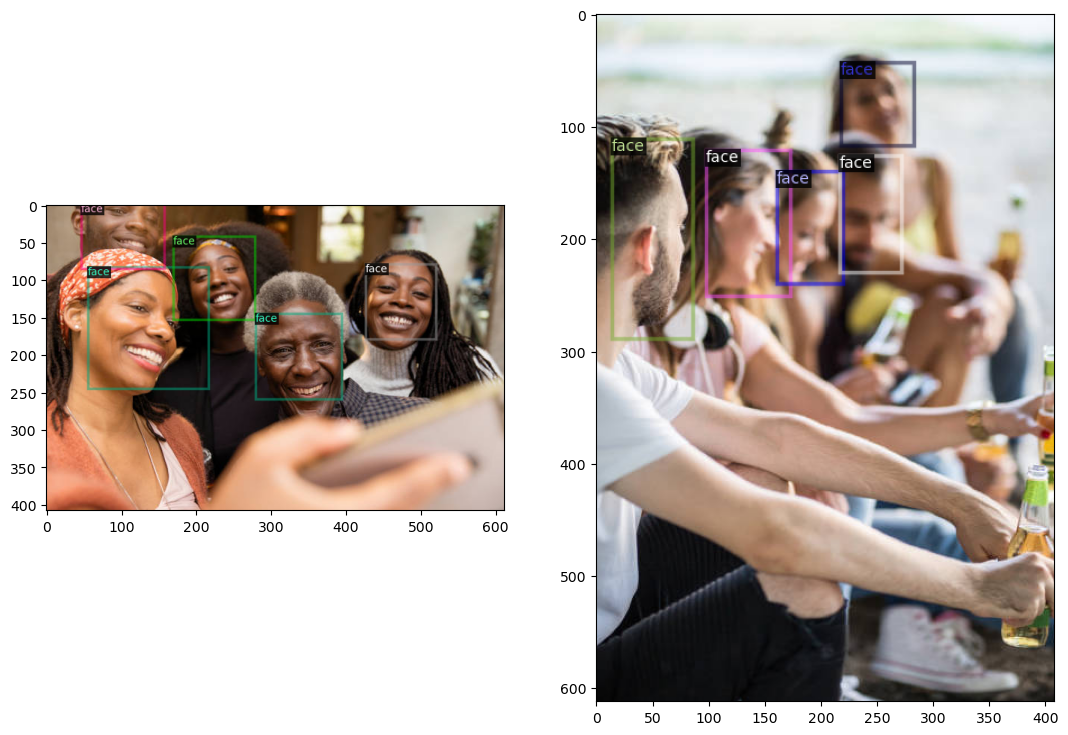

In [5]:
v.plot(ground_truth=True)

Next, let's visualize 5 random images from validation subset and the corresponding ground truth bounding boxes:

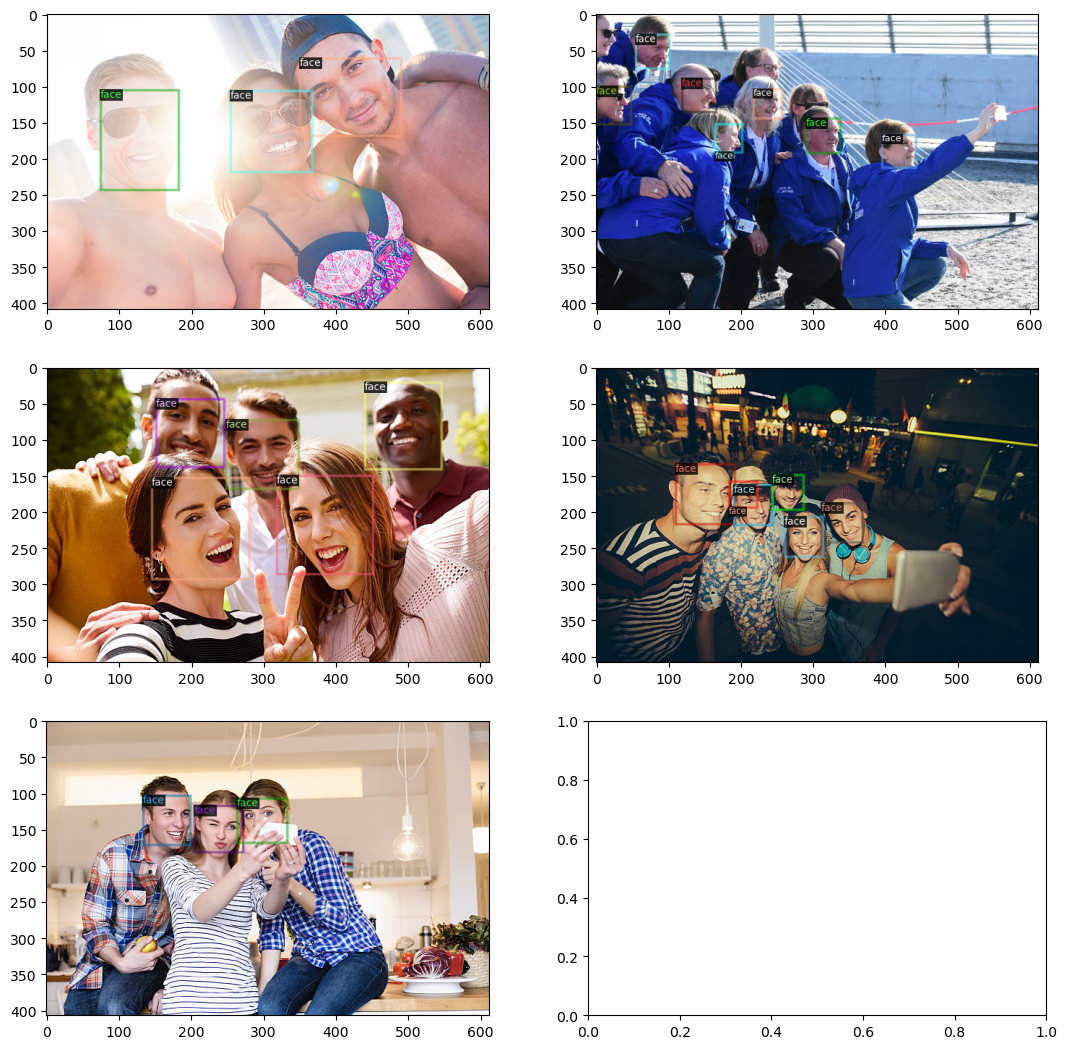

In [6]:
v.plot(num_to_show=5, subset="val", ground_truth=True)

The example below plots 4 random images from test subset and predicts bounding boxes for them:

/opt/conda/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


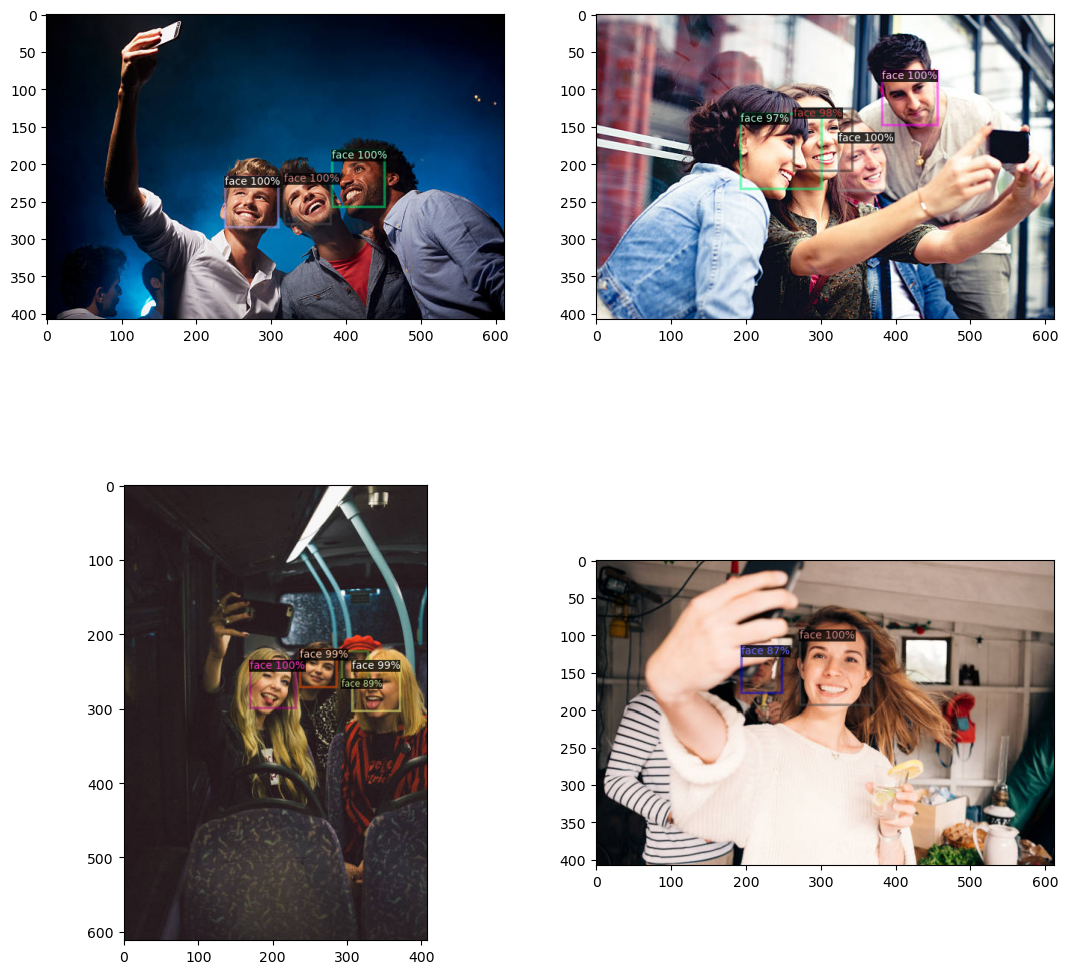

In [8]:
v.plot(num_to_show=4, subset="test", ground_truth=False)

Let's use the same set of parameters, but this time set threshold to lower value - 0.5. As a result, the lower left image contains more predicted bounding boxes:

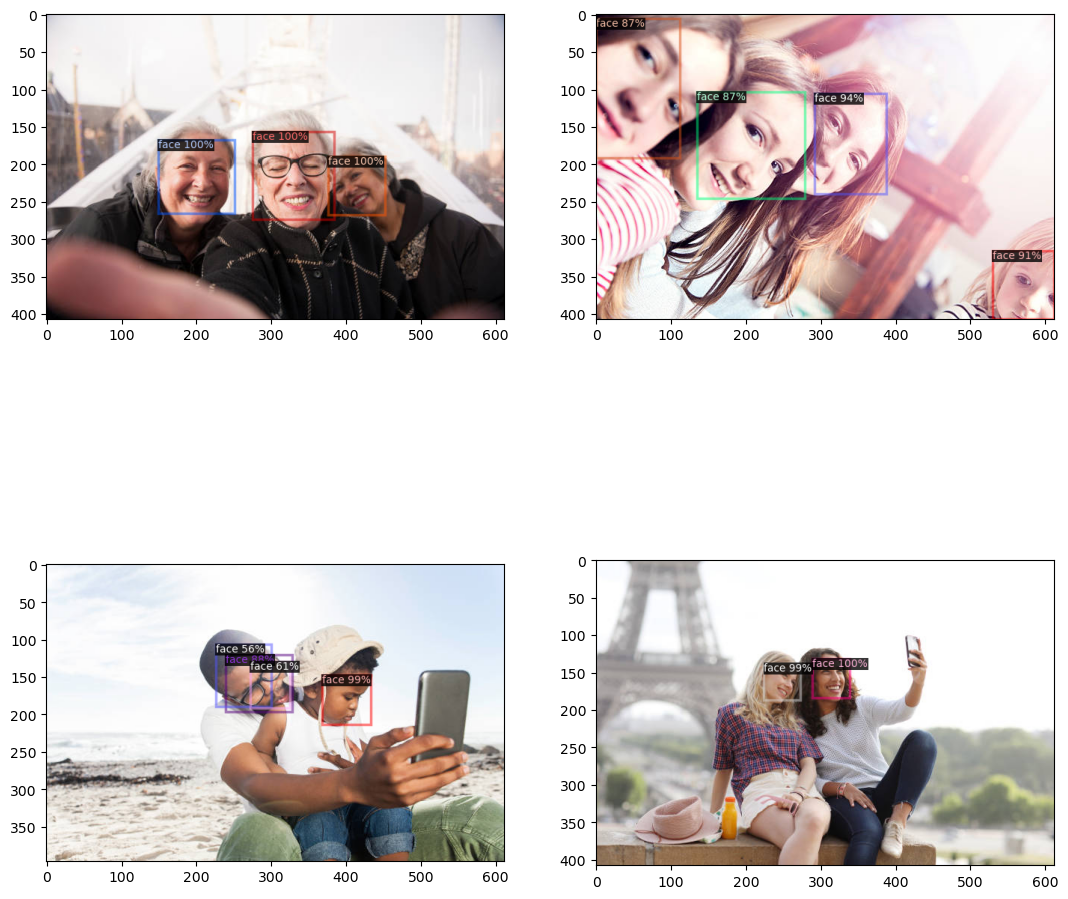

In [11]:
v.plot(num_to_show=4, subset="test", ground_truth=False, threshold=.5)

Now, let's plot predicted bounding boxes for validation subset with the exact same parameters:

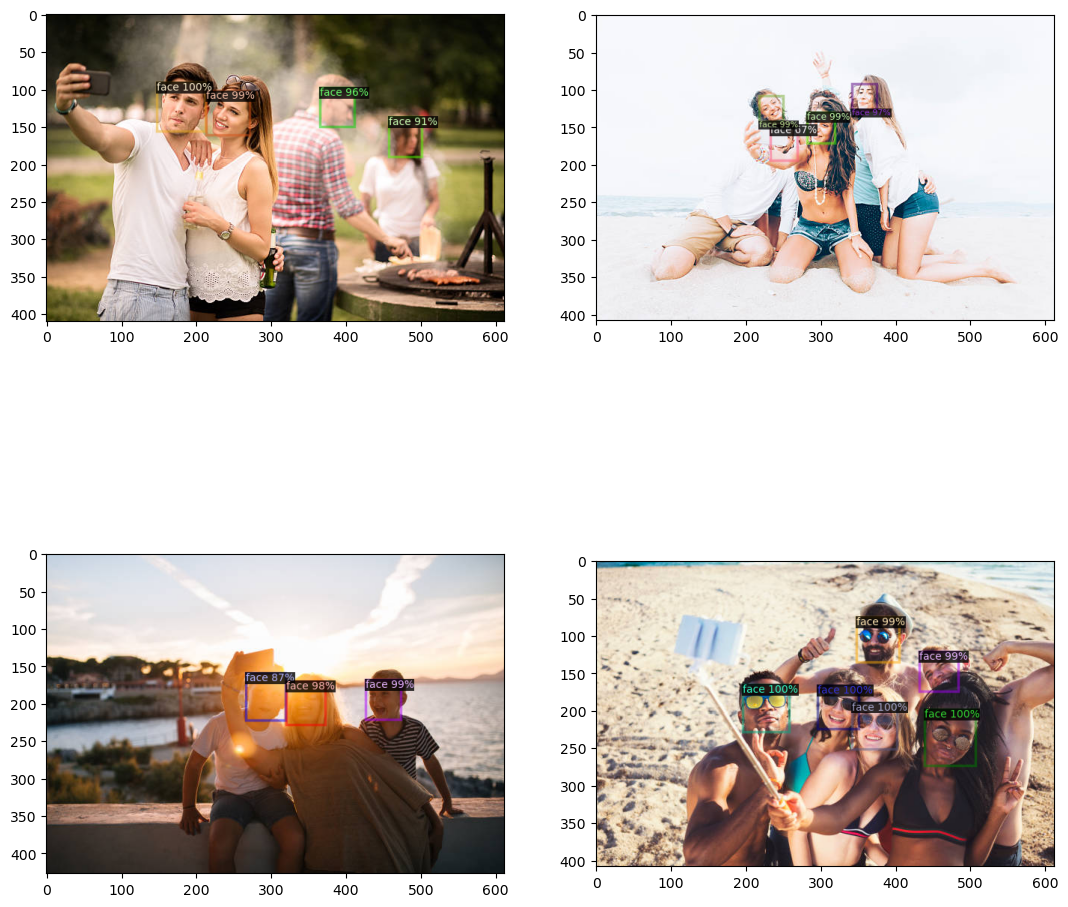

In [12]:
v.plot(num_to_show=4, subset="val", ground_truth=False, threshold=.5)

Finally, here are some more examples of images from test subset and their predicted bounding boxes:

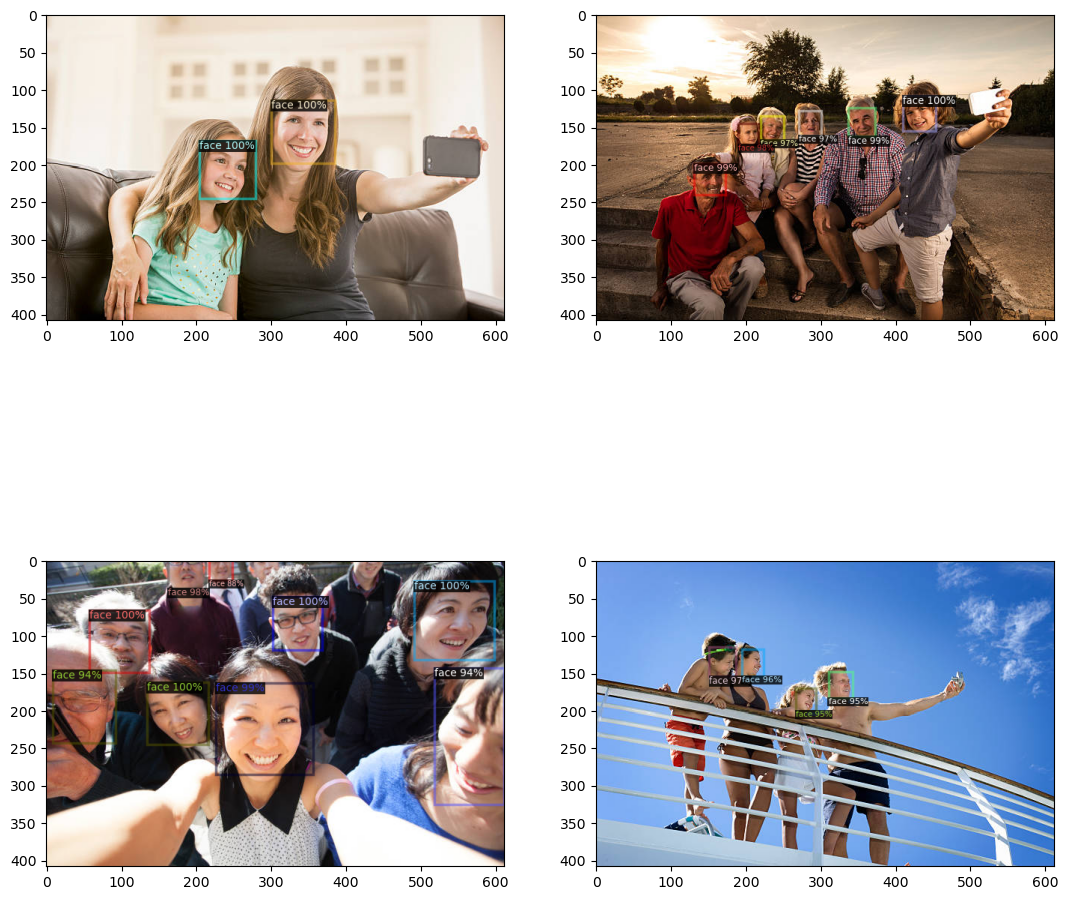

In [13]:
v.plot(num_to_show=4, subset="test", ground_truth=False, threshold=.85)

#### 2.2. SimpleVisualizer.save_predict
The save_predict method is used to *predict* bounding boxes for an arbitrary image defined by **img_path** argument, plot them in the image, and *save* the obtained result to location defined by **save_path** argument. Here, **threshold** means the same as in the previous section. This method can be used like this:

In [14]:
v.save_predict(IMG_PATH, SAVE_PATH, threshold=.85)